In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [309]:

def binary_cross_entropy_loss(Y_true, Y_pred):
    epsilon = 1e-15
    Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)
    return -np.mean(Y_true * np.log(Y_pred) + (1 - Y_true) * np.log(1 - Y_pred))

In [310]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z));

In [311]:
def normalize_features(X):
    X_normalized = X.copy()
    X_normalized['Gender'] = (X_normalized['Gender'] == 'Male').astype(int).values
    X_normalized[["Age"	,"EstimatedSalary"]] = (X_normalized[["Age"	,"EstimatedSalary"]] - X_normalized[["Age"	,"EstimatedSalary"]].mean()) / X_normalized[["Age"	,"EstimatedSalary"]].std()
    
    
    return X_normalized.astype(float)

In [312]:
def fit_logistic_regression(X, y, learning_rate=0.1, num_epochs=10):

    n_samples, n_features = X.shape
    np.random.seed(42)
    weights = np.random.randn(n_features).astype(float) * 0.01
    print(weights)
    bias = 0.0 
    y = y.astype(float)
    for epoch in range(num_epochs):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
 
        loss = binary_cross_entropy_loss(y, y_pred)
        dz = y_pred - y
        dw = (1/n_samples) * np.dot(X.T, dz)
        db = (1/n_samples) * np.sum(dz)
   
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        if epoch % 2 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return weights, bias

In [313]:

def predict(X, weights, bias, threshold=0.5):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    return (probabilities >= threshold).astype(int)


In [314]:
def evaluate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [315]:

def plot_roc_curve(Y_true, Y_scores):
    fpr, tpr, _ = roc_curve(Y_true, Y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc

In [316]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

In [317]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
345,Female,41,63000,0
346,Male,53,72000,1
347,Female,54,108000,1
348,Male,39,77000,0


[ 0.00496714 -0.00138264  0.00647689]
Epoch 0, Loss: 0.6926
Epoch 2, Loss: 0.6602
Epoch 4, Loss: 0.6317
Epoch 6, Loss: 0.6066
Epoch 8, Loss: 0.5846


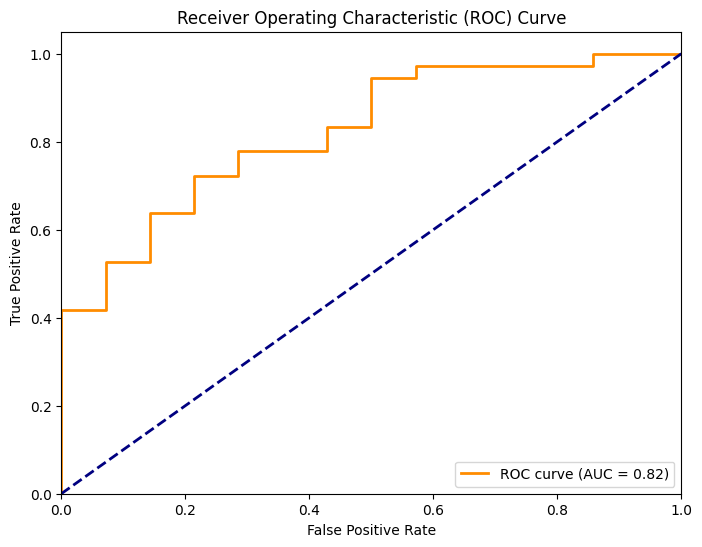

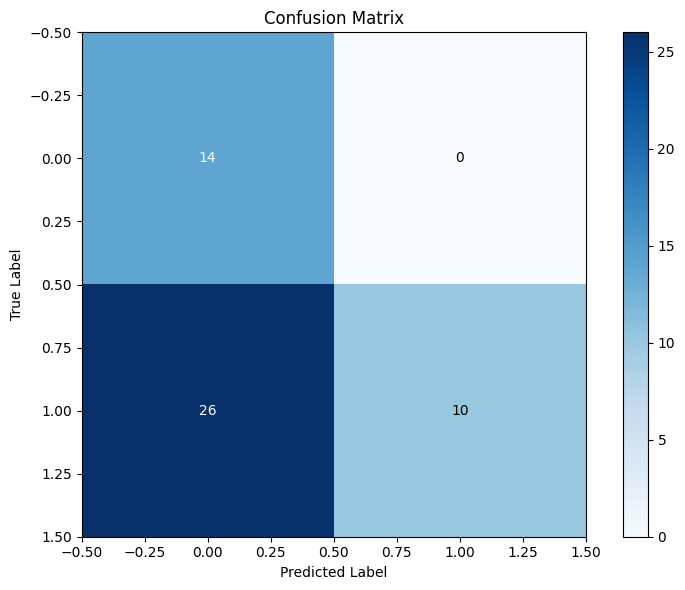

In [318]:

# Normalize the features and handle categorical data
data_train = normalize_features(data_train)
data_test = normalize_features(data_test)

# Extract features and labels
X_train = data_train[['Gender', 'Age', 'EstimatedSalary']].values
y_train = data_train['Purchased'].values
X_test = data_test[['Gender', 'Age', 'EstimatedSalary']].values
y_test = data_test['Purchased'].values



# Train logistic regression model
learning_rate = 0.1
num_epochs = 10
weights, bias = fit_logistic_regression(X_train, y_train, learning_rate, num_epochs)

# Make predictions on the test set
y_pred_test = predict(X_test, weights, bias)

# Calculate and print evaluation metrics
evaluate_metrics(y_test, y_pred_test)

# Generate and plot ROC curve
y_scores = sigmoid(np.dot(X_test, weights) + bias)  # Calculate probabilities for ROC
plot_roc_curve(y_test, y_scores)

# Generate and plot confusion matrix
plot_confusion_matrix(y_test, y_pred_test)